In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error



In [2]:
df= pd.read_csv("with_sin_cos_all_nan_removed.csv")

In [3]:
df

,lat,lon,time,ALBDO_L1_Avg_1,DLWRF_L1_Avg_1,DSWRF_L1_Avg_1,GUST_L1,HPBL_L1,LHTFL_L1_Avg_1,PRES_L1,...,ULWRF_L1_Avg_1,USWRF_L1_Avg_1,V_GRD_L103,VIS_L1,Station Name,PM 2.5,AOD,PRATE_L1_Avg_1,sin_month,cos_month
0,22.630,88.352,2021-01-01,5.98142,312.559000,204.350000,3.826027,301.986018,30.057888,101429.166812,...,421.298931,24.68100,-3.067933,24135.001953,Belur Math,77.654583,0.581550,0.000000e+00,0.500000,0.866025
1,22.630,88.352,2021-01-02,5.97004,313.683534,202.960000,3.101588,267.144669,30.471104,101373.725500,...,422.392632,24.65800,-2.350824,24135.046875,Belur Math,58.124737,0.425139,0.000000e+00,0.500000,0.866025
2,22.630,88.352,2021-01-03,5.93766,322.803813,195.740000,2.774223,262.226417,28.723234,101257.671000,...,425.339199,23.57400,-2.127140,24135.080078,Belur Math,NaN,0.665841,0.000000e+00,0.500000,0.866025
3,22.630,88.352,2021-01-04,5.91420,333.227000,202.500000,2.184178,245.017254,29.531700,101243.457063,...,432.330161,24.27400,-1.479325,24134.914062,Belur Math,76.667778,0.415729,0.000000e+00,0.500000,0.866025
4,22.630,88.352,2021-01-05,5.89578,342.897000,200.550000,2.317436,244.012100,30.009221,101231.065125,...,439.300757,24.09300,-0.909857,24134.949219,Belur Math,92.684583,0.384968,0.000000e+00,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9725,22.545,88.340,2023-08-27,11.06430,447.360698,218.351436,4.011113,509.447365,121.838930,100109.151406,...,480.649783,21.86660,1.165340,24134.960938,Victoria,40.327917,0.810233,3.322000e-06,-0.866025,-0.500000
9726,22.545,88.340,2023-08-28,11.38305,446.798837,254.572562,3.222736,348.428543,132.334216,100105.622344,...,491.225494,25.90458,0.574886,24134.876953,Victoria,60.819167,0.810233,0.000000e+00,-0.866025,-0.500000
9727,22.545,88.340,2023-08-29,11.53260,449.412098,170.017404,2.810299,586.165287,94.150990,100182.874219,...,486.897797,17.79536,0.228833,24135.013672,Victoria,70.484583,0.810233,1.620000e-07,-0.866025,-0.500000
9728,22.545,88.340,2023-08-30,11.89660,444.362351,238.533522,2.842451,508.752148,110.109848,100287.627813,...,494.799905,25.23142,0.528769,24134.886719,Victoria,68.857619,0.810233,4.600000e-08,-0.866025,-0.500000


In [4]:
df['time'] = pd.to_datetime(df['time'])

In [5]:

# Assuming your data is in a pandas DataFrame named 'df'
# Make sure your 'time' column is in datetime format
df['time'] = pd.to_datetime(df['time'])

# Filter data for dates between January 1, 2021, and December 31, 2022
date_range_start = '2021-01-01'
date_range_end = '2022-12-31'
date_mask = (df['time'] >= date_range_start) & (df['time'] <= date_range_end)
filtered_data = df[date_mask]

# Further filter based on 'PM 2.5' range
pm_mask = (filtered_data['PM 2.5'] >= 30) & (filtered_data['PM 2.5'] <= 250)
final_filtered_data = filtered_data[pm_mask]

# Create a new DataFrame with the filtered data
new_df = pd.DataFrame(final_filtered_data)

# Display the new DataFrame
print(new_df)


         lat     lon       time  ALBDO_L1_Avg_1  DLWRF_L1_Avg_1  \
0     22.630  88.352 2021-01-01         5.98142      312.559000   
1     22.630  88.352 2021-01-02         5.97004      313.683534   
3     22.630  88.352 2021-01-04         5.91420      333.227000   
4     22.630  88.352 2021-01-05         5.89578      342.897000   
5     22.630  88.352 2021-01-06         5.86226      355.172000   
...      ...     ...        ...             ...             ...   
9482  22.545  88.340 2022-12-27         5.61565      361.617300   
9483  22.545  88.340 2022-12-28         5.65195      337.161187   
9484  22.545  88.340 2022-12-29         5.74805      307.254359   
9485  22.545  88.340 2022-12-30         5.71075      314.481768   
9486  22.545  88.340 2022-12-31         5.71550      322.851497   

      DSWRF_L1_Avg_1   GUST_L1     HPBL_L1  LHTFL_L1_Avg_1        PRES_L1  \
0         204.350000  3.826027  301.986018       30.057888  101429.166812   
1         202.960000  3.101588  267.14466

In [6]:
new_df = new_df.drop(["Station Name","AOD"], axis=1)

In [7]:
# Remove rows with NaN values
new_df= new_df.dropna()

In [8]:
new_df

,lat,lon,time,ALBDO_L1_Avg_1,DLWRF_L1_Avg_1,DSWRF_L1_Avg_1,GUST_L1,HPBL_L1,LHTFL_L1_Avg_1,PRES_L1,...,TMP_L103,U_GRD_L103,ULWRF_L1_Avg_1,USWRF_L1_Avg_1,V_GRD_L103,VIS_L1,PM 2.5,PRATE_L1_Avg_1,sin_month,cos_month
0,22.630,88.352,2021-01-01,5.98142,312.559000,204.350000,3.826027,301.986018,30.057888,101429.166812,...,293.561722,0.177358,421.298931,24.681000,-3.067933,24135.001953,77.654583,0.000000e+00,5.000000e-01,0.866025
1,22.630,88.352,2021-01-02,5.97004,313.683534,202.960000,3.101588,267.144669,30.471104,101373.725500,...,293.357142,0.641507,422.392632,24.658000,-2.350824,24135.046875,58.124737,0.000000e+00,5.000000e-01,0.866025
3,22.630,88.352,2021-01-04,5.91420,333.227000,202.500000,2.184178,245.017254,29.531700,101243.457063,...,295.297473,-0.406643,432.330161,24.274000,-1.479325,24134.914062,76.667778,0.000000e+00,5.000000e-01,0.866025
4,22.630,88.352,2021-01-05,5.89578,342.897000,200.550000,2.317436,244.012100,30.009221,101231.065125,...,296.791448,-0.299777,439.300757,24.093000,-0.909857,24134.949219,92.684583,0.000000e+00,5.000000e-01,0.866025
5,22.630,88.352,2021-01-06,5.86226,355.172000,198.774000,2.081998,263.980614,28.888099,101035.096312,...,297.669039,1.169065,452.033445,23.774000,-0.265803,24134.955078,132.424348,0.000000e+00,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,22.545,88.340,2022-12-27,5.61565,361.617300,192.958251,3.958173,403.533670,25.710091,101298.218750,...,297.460245,2.247126,448.608328,21.978480,-0.238416,23725.349258,69.617500,0.000000e+00,-2.449294e-16,1.000000
9483,22.545,88.340,2022-12-28,5.65195,337.161187,196.010448,4.912187,394.828016,29.517080,101423.074531,...,295.162292,0.292261,437.105191,22.483199,-3.372876,24134.974609,122.754583,1.800000e-08,-2.449294e-16,1.000000
9484,22.545,88.340,2022-12-29,5.74805,307.254359,203.216849,3.685035,370.541810,27.342413,101615.603281,...,293.195768,0.635704,421.643488,23.690880,-2.657268,24134.886719,102.431667,0.000000e+00,-2.449294e-16,1.000000
9485,22.545,88.340,2022-12-30,5.71075,314.481768,201.096702,2.229730,352.894260,25.946900,101644.569375,...,293.348338,0.984448,421.973019,23.313440,-1.411297,24135.042969,135.250833,0.000000e+00,-2.449294e-16,1.000000


In [ ]:
# high_pm= df[df['PM 2.5']>30]

In [ ]:
# high_pm

In [10]:
# Assuming your DataFrame is named 'df'
X = new_df.drop(['PM 2.5',"time"], axis=1)  # Features (excluding the target variable)
y = new_df['PM 2.5']  # Target variable


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
#print(X_test.dtypes)

In [13]:

# Create the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)




RandomForestRegressor(random_state=42)

In [14]:
from sklearn.model_selection import cross_val_score


# Assuming rf_model is your Random Forest model
cross_val_scores = cross_val_score(rf_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_cross_val = np.sqrt(-cross_val_scores.mean())

print(f'Cross-Validated RMSE: {rmse_cross_val:.4f}')


Cross-Validated RMSE: 17.6723


In [15]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)


DLWRF_L1_Avg_1    0.423981
lat               0.145532
LHTFL_L1_Avg_1    0.080575
R_H_L103          0.064632
GUST_L1           0.045176
V_GRD_L103        0.038457
ALBDO_L1_Avg_1    0.031083
SHTFL_L1_Avg_1    0.024895
lon               0.020974
U_GRD_L103        0.018794
PRES_L1           0.017181
HPBL_L1           0.015564
DSWRF_L1_Avg_1    0.015380
TMP_L103          0.014186
ULWRF_L1_Avg_1    0.012675
VIS_L1            0.012431
USWRF_L1_Avg_1    0.011739
cos_month         0.003068
PRATE_L1_Avg_1    0.002236
sin_month         0.001441
dtype: float64


In [16]:
from sklearn.metrics import mean_squared_error, r2_score


# Make predictions on the training set
y_train_pred = rf_model.predict(X_train)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Calculate RMSE for training and testing sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R-squared for training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display the results
print(f'Training RMSE: {rmse_train:.4f}')
print(f'Testing RMSE: {rmse_test:.4f}')

print(f'Training R-squared: {r2_train:.4f}')
print(f'Testing R-squared: {r2_test:.4f}')



Training RMSE: 6.4598
Testing RMSE: 17.0612
Training R-squared: 0.9756
Testing R-squared: 0.8289


In [17]:
import joblib

# Save the model to a file
model_filename = 'random_forest_model_20_12_2nd.pkl'
joblib.dump(rf_model, model_filename)



['random_forest_model_20_12_2nd.pkl']

ready unseen data

In [18]:
df1= pd.read_csv("with_sin_cos_all_nan_removed.csv")

In [ ]:
# df['time'] = pd.to_datetime(df['time'])

In [31]:
import pandas as pd

# Assuming your data is in a pandas DataFrame named 'df'
# Make sure your 'time' column is in datetime format
df1['time'] = pd.to_datetime(df1['time'])

# Filter data for dates between January 1, 2021, and December 31, 2022
date_range_start = '2023-01-01'
date_range_end = '2023-08-30'
date_mask = (df1['time'] >= date_range_start) & (df1['time'] <= date_range_end)
filtered_data = df1[date_mask]

# Further filter based on 'PM 2.5' range
pm_mask = (filtered_data['PM 2.5'] >= 30) & (filtered_data['PM 2.5'] <= 250)
final_filtered_data = filtered_data

# Create a new DataFrame with the filtered data
new_df1 = pd.DataFrame(final_filtered_data)

# Display the new DataFrame
print(new_df1)



         lat     lon       time  ALBDO_L1_Avg_1  DLWRF_L1_Avg_1  \
730   22.630  88.352 2023-01-01         5.87660      336.976559   
731   22.630  88.352 2023-01-02         5.91690      326.080230   
732   22.630  88.352 2023-01-03         5.97950      311.428873   
733   22.630  88.352 2023-01-04         5.98626      302.621301   
734   22.630  88.352 2023-01-05         5.92432      308.412030   
...      ...     ...        ...             ...             ...   
9724  22.545  88.340 2023-08-26        10.43760      440.044883   
9725  22.545  88.340 2023-08-27        11.06430      447.360698   
9726  22.545  88.340 2023-08-28        11.38305      446.798837   
9727  22.545  88.340 2023-08-29        11.53260      449.412098   
9728  22.545  88.340 2023-08-30        11.89660      444.362351   

      DSWRF_L1_Avg_1   GUST_L1     HPBL_L1  LHTFL_L1_Avg_1        PRES_L1  \
730       197.610503  1.796455  347.293990       25.495634  101672.614250   
731       201.362680  2.286283  403.21588

In [32]:
new_df1= new_df1.dropna()

In [33]:
X_unseen = new_df1.drop(['PM 2.5','Station Name',"time","AOD"], axis=1)  # Features (excluding the target variable)

In [34]:
# Later, when you want to use the model for predictions on unseen data:
# Load the model from the file
import joblib
loaded_model = joblib.load(model_filename)

#Make predictions on unseen data (replace X_unseen with your actual unseen data)
y_unseen_pred = loaded_model.predict(X_unseen)

#Display the predictions on unseen data
print(y_unseen_pred)
pm=(new_df1["PM 2.5"])
print(pm)


[118.99346198 111.57583192  91.54202071 ...  34.60805514  35.09475856
  39.63642026]
730     105.064167
731      78.143478
732      92.402917
733      75.740833
734      85.817500
           ...    
9724     23.547500
9725     40.327917
9726     60.819167
9727     70.484583
9728     68.857619
Name: PM 2.5, Length: 2384, dtype: float64


In [35]:
rmse = np.sqrt(mean_squared_error(y_unseen_pred, pm))

In [36]:
rmse

25.456847188707673

In [37]:
r2_unseen = r2_score(y_unseen_pred, pm)

In [38]:

r2_unseen

0.4154720457800969

In [39]:
import numpy as np

# Assuming y_unseen_pred and pm_actual are your predicted and actual PM 2.5 values
correlation_coefficient = np.corrcoef(y_unseen_pred, pm)[0, 1]

print(f'Correlation coefficient between predicted and actual PM 2.5: {correlation_coefficient:.4f}')


Correlation coefficient between predicted and actual PM 2.5: 0.8356


In [40]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_actual and y_pred are your actual and predicted values
y_actual_tttt = np.array([pm])  # Replace with your actual values
y_pred_tttt = np.array([y_unseen_pred])  # Replace with your predicted values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_actual_tttt, y_pred_tttt))

# Calculate the mean of the target variable
mean_target = np.mean(y_actual_tttt)

# Compare RMSE with Mean
print(f'RMSE: {rmse:.4f}')
print(f'Mean of the Target Variable: {mean_target:.4f}')

# Normalize RMSE by dividing by the mean
nrmse = rmse / mean_target
print(f'Normalized RMSE (NRMSE): {nrmse:.4f}')


RMSE: 25.4568
Mean of the Target Variable: 44.5682
Normalized RMSE (NRMSE): 0.5712


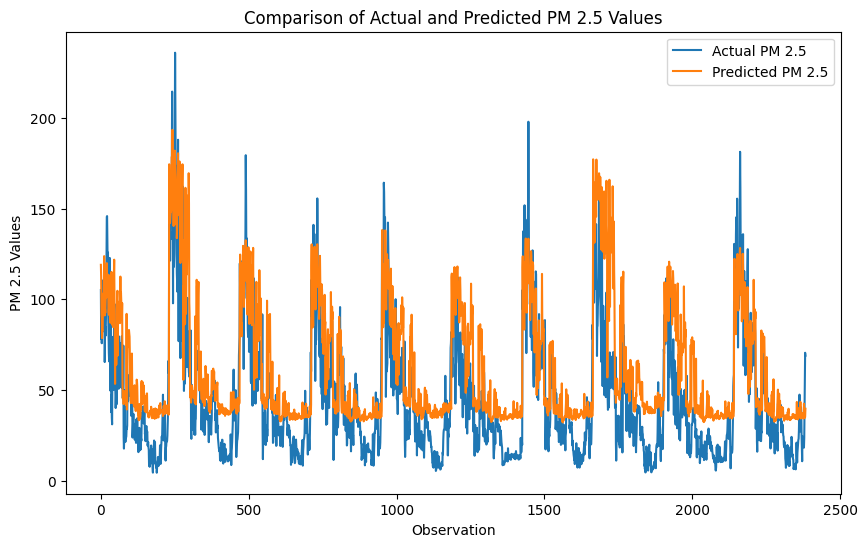

In [41]:
import matplotlib.pyplot as plt


# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(y_actual_tttt.flatten(), label='Actual PM 2.5')
plt.plot(y_pred_tttt.flatten(), label='Predicted PM 2.5')

# Add labels and title
plt.xlabel('Observation')
plt.ylabel('PM 2.5 Values')
plt.title('Comparison of Actual and Predicted PM 2.5 Values')

# Add legend
plt.legend()

# Show the plot
plt.show()
